# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Humans might not be so hot after all
In a study of 130 people, the mean body temperature is found to be 98.25 degrees F. The observed temperatures ranged from 96.3 to 100.8 degrees. This does encompass 98.6 degrees, but does the data suggest it could be the true mean human temperature?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
sns.set()

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
temp_all = df.temperature
temp_m = df[df.gender == 'M'].temperature
temp_f = df[df.gender == 'F'].temperature

In [5]:
statistics = pd.concat([temp_all.describe(), temp_m.describe(), temp_f.describe()], axis=1)
statistics.columns = ["All Temps", "Male Temps", "Female Temps"]
statistics

,All Temps,Male Temps,Female Temps
count,130.000000,65.000000,65.000000
mean,98.249231,98.104615,98.393846
std,0.733183,0.698756,0.743488
min,96.300000,96.300000,96.400000
25%,97.800000,97.600000,98.000000
50%,98.300000,98.100000,98.400000
75%,98.700000,98.600000,98.800000
max,100.800000,99.500000,100.800000


## Initial Observations
### Total Sample - Male and Female
 - Mean temperature: $\bar{x}$ = 98.249231
 - Standard deviation: s<sub>x</sub> = 0.733183
 - Sample count: n = 130

### Male Sample
* Mean temperature: $\bar{x}$ = 98.104615
* Standard deviation: s<sub>x</sub> = 0.698756
* Sample count: n = 65

### Female Sample
* Mean temperature: $\bar{x}$ = 98.393846
* Standard deviation: s<sub>x</sub> = 0.743488
* Sample count: n = 65

Our first inspection of the data indicates the mean body temperature for this sample of the populations is 98.25 degrees. This is 0.35 less than the expected mean of 98.6 degrees. Females, on average, tend to be slightly warmer at 98.39 than the male mean of 98.10. A quick visualization of the data shows there's also a wider spread in female temperatures.

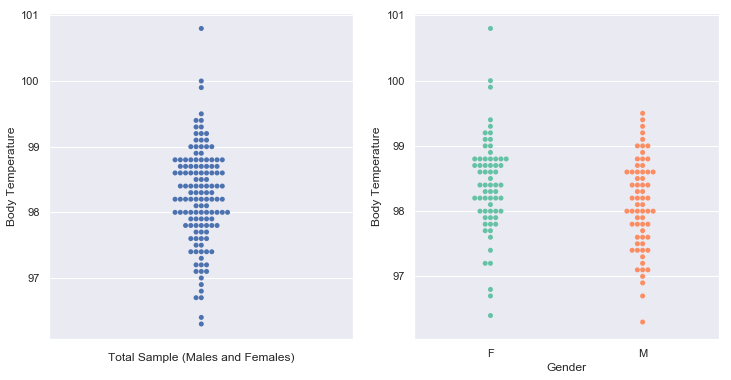

In [6]:
# Bee swarm plot
fig, ax = plt.subplots(figsize=(12,6))

ax1 = plt.subplot(1, 2, 1)
_ = sns.swarmplot(y= 'temperature', data= df)

_ = plt.xlabel('Total Sample (Males and Females)')
_ = plt.ylabel('Body Temperature')

# By gender
plt.subplot(1, 2, 2)
_ = sns.swarmplot(x= 'gender', y= 'temperature', data= df, palette="Set2")

_ = plt.xlabel('Gender')
_ = plt.ylabel('Body Temperature')


plt.show()

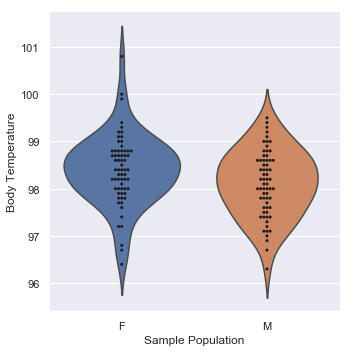

In [7]:
# Bee swarm plot

g = sns.catplot(x="gender", y="temperature", kind="violin", inner=None, data=df)
_ = sns.swarmplot(x="gender", y="temperature", color="k", size=3, data=df, ax=g.ax);

_ = plt.xlabel('Sample Population')
_ = plt.ylabel('Body Temperature')


plt.show()

### 1. Is the distribution of body temperatures normal?
Before we perform further statistical analysis on this data, we'll determine if its distribution can be considered normal. To do this, we'll plot a histogram and compare the data's CDF to a normally distributed curve.

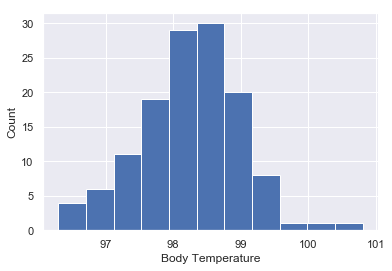

In [8]:
# Histogram

# Compute the square root of number of data points. This will be our number of bins.
n_bins = int(np.sqrt(len(df.temperature)))

# Plot the histogram of temperatures
_ = plt.hist(df.temperature, bins = n_bins)

_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('Count')

plt.show()

Other than a thin tail on the right, this looks fairly normally ditributed. To avoid bin bias, we'll examine the cumulative distribution function and overlay a normal distribution.

In [9]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

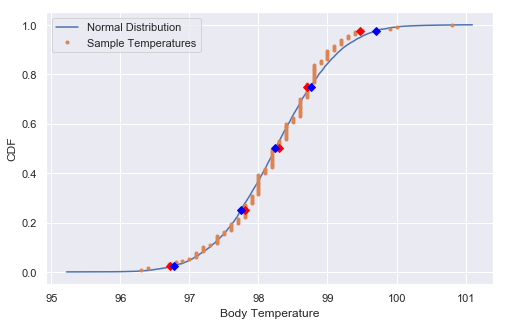

In [10]:
# CDF: The data compared to a normally distributed curve

# Compute mean and standard deviation: mu, sigma
mu = np.mean(temp_all)
sigma = np.std(temp_all)

# Sample out of a normal distribution with this mu and sigma
samples = np.random.normal(loc=mu, scale=sigma, size=10000)

# Create array of percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute temp percentiles
ptiles_temp = np.percentile(temp_all, percentiles)
# Compute theoretical percentiles
ptiles_theor = np.percentile(samples, percentiles)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(temp_all)

# Plot the CDFs
fig, ax = plt.subplots(figsize=(8,5))
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('CDF')

# Overlay temp percentiles as red diamonds.
_ = plt.plot(ptiles_temp, percentiles/100, marker='D', color='red', linestyle='none')
# Overlay theoretical percentiles as blue diamonds.
_ = plt.plot(ptiles_theor, percentiles/100, marker='D', color='blue', linestyle='none')

plt.legend(['Normal Distribution', 'Sample Temperatures'])

plt.show()

We can see from the CDF plot that the quartiles line up fairly well. Although the right tail (97.5th percentile) differs slightly from the theoretical model, it is not unreasonabe to consider the data to be normally distributed.

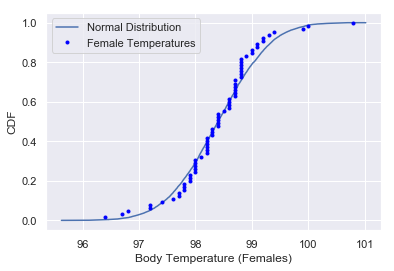

In [11]:
# FEMALES: Comparing data to a normal distribution

# Compute mean and standard deviation: mu, sigma
mu = np.mean(temp_f)
sigma = np.std(temp_f)


# Sample out of a normal distribution with this mu and sigma: samples
normal = np.random.normal(loc=mu, scale=sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(normal)
x, y = ecdf(temp_f)


# Plot the CDFs
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none', color='blue')
_ = plt.xlabel('Body Temperature (Females)')
_ = plt.ylabel('CDF')

plt.legend(['Normal Distribution', 'Female Temperatures'])

plt.show()

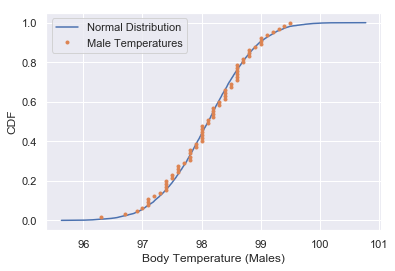

In [12]:
# MALES: Comparing data to a normal distribution

# Compute mean and standard deviation: mu, sigma
mu = np.mean(temp_m)
sigma = np.std(temp_m)


# Sample out of a normal distribution with this mu and sigma: samples
normal = np.random.normal(loc=mu, scale=sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(normal)
x, y = ecdf(temp_m)


# Plot the CDFs
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Body Temperature (Males)')
_ = plt.ylabel('CDF')

plt.legend(['Normal Distribution', 'Male Temperatures'])

plt.show()

#### Quantitative Normality Test

In [13]:
print("All Samples: ", stats.normaltest(temp_all))
print("Male Samples: ", stats.normaltest(temp_m))
print("Female Samples: ", stats.normaltest(temp_f))

All Samples:  NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)
Male Samples:  NormaltestResult(statistic=0.8911999666950502, pvalue=0.6404399074569123)
Female Samples:  NormaltestResult(statistic=4.7354381129084, pvalue=0.09369419389856398)


P-values for male, female and the combined data fall within a 95% confidence level of normality. Our visual and quantitative inspection of the data supports our assumption that the data is normally distributed. 

### 2. Sample Size and Independence
  

The Central Limit Theorem says that when independent random variables are averaged, their mean tends toward a normal distribution even if the original variables themselves are not normally distributed. This generally holds true for sample sizes of n > 30. Our sample contains 65 male temperatures and 65 female temperatures, for a total of n = 130. This is sufficiently large enough to meet the independence condition for the Central Limit Theorem.

### 3. Is the true population mean really 98.6 degrees F?

#### First, we try a bootstrap hypothesis test.
Let's assume that mean human body temperature is indeed the widely accepted 98.6 degrees. We'll replicate 

* H<sub>0</sub>: Our null hypothesis is that the mean human body temperature is 98.6 degrees F (x = 98.6)
* H<sub>a</sub>: Our alternative hypothesis is that the mean human body temperature is less than 98.6 degrees F (x < 98.6)
* _&alpha;_: Set alpha to be within a 95% confidence level

In [14]:
# Generating many bootstrap replicates

def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) 

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [15]:
# Make an array of translated body tempratures
translated_temps = temp_all + 98.6 - np.mean(temp_all)

# Take bootstrap replicates of translated body tempratures
bs_replicates = draw_bs_reps(translated_temps, np.mean, 10000)

# Compute fraction of replicates that are less than the observed temperatures
p = np.sum(bs_replicates <= np.mean(temp_all)) / 10000

# Print the p-value
print('p = ', p)

print("Min replicated mean:", min(bs_replicates))
print("Max replicated mean:", max(bs_replicates))

p =  0.0
Min replicated mean: 98.34923076923079
Max replicated mean: 98.85615384615387


The p-value of 0 is less than alpha, our significance level. Even when we increase the number of trials to be 1,000,000, the p-value is 0. In other words, assmuing the mean temperature is 98.6 degrees, there is _less than_ one in a million chance of getting a mean of 98.25 or less. Thus, we will reject the null hypothesis. **Our data strongly suggests the mean human body temperature is less than 98.6 degrees F.**

### Now, let's try frequentist statistical testing. 
* We will use a one sample test, as we're comparing our total sample against a statistic.
* Should we use a t statistic or z statistic for our test? Generally, z scores are used when the population standard deviation is known. If it is not known, calculations must be made with the sample's standard deviation. This can lead to an over estimation of the p-value, particularly when the sample size is small. Using a t score will reduce these estimation errors. However, when the sample size is sufficiently large (N > 30), the z and t statistics produce similar results. As our sample has 130 observations, we can use either statistic. 

#### Z-statistic

*Known values*
 - Sample mean: $\bar{x}$ = 98.249231
 - Sample standard deviation: s<sub>x</sub> = 0.733183
 - Sample count: n = 130
 
*Assumptions*
 - Assumed population Mean: $\mu$<sub>0</sub> = 98.6
 - Population standard deviation is unknown $\sigma$ = ?
 - Estimate with sample std: $\sigma$ = $\frac{ s }{\sqrt{n}}$ = $\frac{0.733183}{\sqrt{130}}$ = 0.064304
 
*Statistic calculation*
 - z = $\frac{\bar{x} - \mu}{\sigma}$


In [16]:
def z_stat (data, hyp_mean):
    mu_0 = hyp_mean
    x = np.mean(data)
    s = np.std(data)
    n = len(data)
    
    # Calculate z-score
    z = (x - mu_0)/(s/np.sqrt(n))
    
    # Calculate p-value
    p = stats.norm.cdf(z)
    return (z, p)

z_all, p_all = z_stat(temp_all, 98.6)
print('The z-score for {} degrees is: {}'.format(98.25, z_all))
print('The p-value is: {}'.format(p_all))

#Sample the normal distribution with a mean of 98.6 and standard deviation of 0.064
hypothesized_mean_distribution = np.random.normal(98.6, 0.064, size = 10000)
#Calculate the 99th percentile
percentiles = np.percentile(hypothesized_mean_distribution, [0.5,99.5])

print('\n0.5 percentile: {}\n99.5 percentile: {}'.format(percentiles[0],
                                                         percentiles[1]))

The z-score for 98.25 degrees is: -5.4759252020785585
The p-value is: 2.1761575829356528e-08

0.5 percentile: 98.43338571710429
99.5 percentile: 98.76050524965532


#### T - Statistic

In [17]:
stats.ttest_1samp(temp_all, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
* When examining samples of n < 30, it is customary to use a t-test instead of a z-test.
* As demostrated below, the t-test will give a higher p-value 

In [18]:
z_test = []
t_test = []


# Run 5 trials
for i in range(5):
    
    # Extract sample of size 10 from the data
    sample_of_10 = np.random.choice(temp_all, 10)
    
    # Calculate Z and t statistics with corresponding p-value
    z, p_z = z_stat(sample_of_10, 98.6)
    t, p_t = stats.ttest_1samp(sample_of_10, 98.6)
    
    #append results to each list
    z_test.append((z, p_z))
    t_test.append((t, p_t))

# Transform results into dataframes for readability
z_statistics = pd.DataFrame(z_test, columns=['z-score', 'p-value (z)'])
t_statistics = pd.DataFrame(t_test, columns=['t-score', 'p-value (t)'])

# Combine the results into one table
trials = pd.concat([z_statistics, t_statistics], axis=1)
trials

,z-score,p-value (z),t-score,p-value (t)
0,-3.047182,0.001155,-2.890811,0.017861
1,-1.753470,0.039761,-1.663488,0.130575
2,-1.044544,0.148117,-0.990942,0.347606
3,-1.198403,0.115380,-1.136905,0.284941
4,-0.543928,0.293245,-0.516016,0.618281


### 5. At what temperature should we consider someone's temperature to be "abnormal"?
* We will consider a temperature to be abnormal if it's outside of the 99% of the normal distribution.
* For a 99% confidence interval, we'll use a z-value of 2.58 to calculate the margin of error.
* Margin of error = z * $\sigma / \sqrt{n}$

In [19]:
# Sample the normal distribution with our data's mean of 98.25 and standard deviation of 0.064
sample_distribution = np.random.normal(98.25, 0.064, size = 10000)

# Calculate the 99th percentile
percentiles = np.percentile(sample_distribution, [0.5,99.5])

print('\n0.5 percentile: {}\n99.5 percentile: {}'.format(percentiles[0],
                                                         percentiles[1]))

# Calculate margin or error
margin_error = 2.58 * np.std(temp_all) / np.sqrt(len(temp_all))

print("Margin of error = ", margin_error)


0.5 percentile: 98.08257800937947
99.5 percentile: 98.41383198521436
Margin of error =  0.1652660659135989


Mean: 98.249911
SEM: 0.06405661469519337
STD: 0.06420972807598328
95% Confidence interval: [98.12230769 98.37538462]


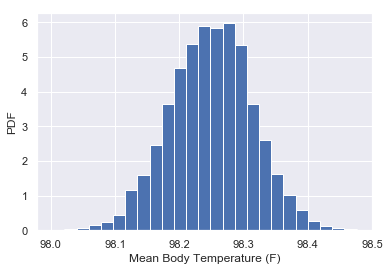

In [20]:
# What does the data suggest is the mean human body temperature?


# Take 10,000 bootstrap replicates of the mean
bs_replicates = draw_bs_reps(data=temp_all, func=np.mean, size=10000)

# Compute and print the mean of the means
mean = np.mean(bs_replicates)
print("Mean:", mean)

# Compute and print the standard error of the mean (SEM)
sem = np.std(temp_all) / np.sqrt(len(temp_all))
print("SEM:", sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print("STD:", bs_std)

# Compute and print confidence interval
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print("95% Confidence interval:", conf_int)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=25, density=True)
_ = plt.xlabel('Mean Body Temperature (F)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

### 6. Is there a significant difference between males and females in normal temperature?
* What testing approach did you use and why?
* Write a story with your conclusion in the context of the original problem.

#### Visual inspection

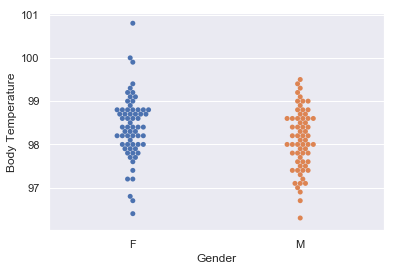

In [21]:
# Bee swarm plot
_ = sns.swarmplot(x= 'gender', y= 'temperature', data= df)

# Label the axes
_ = plt.xlabel('Gender')
_ = plt.ylabel('Body Temperature')

# Show the plot
plt.show()

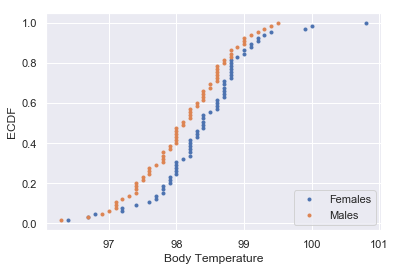

In [22]:
# Compute ECDFs
#x_all, y_all = ecdf(temp_all)
x_f, y_f = ecdf(temp_f)
x_m, y_m = ecdf(temp_m)



# Plot all ECDFs on the same plot
#_ = plt.plot(x_all, y_all, marker = '.', linestyle='none')
_ = plt.plot(x_f, y_f, marker = '.', linestyle='none')
_ = plt.plot(x_m, y_m, marker = '.', linestyle='none')


#plt.legend(('All', 'Males', 'Females'), loc='lower right')
plt.legend(('Females', 'Males'), loc='lower right')
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('ECDF')

plt.show()

The difference in mean temperature is much clearer in the ECDF. The mean is larger in the female data, and the variance appears larger as well.

### Two Sample Test
We will hypothesize that there's no difference between male and female temperatures. What is the probability we would find data showing a difference of 0.289 degrees?

#### Bootstrap method

In [23]:
# Compute mean of all forces: mean_force
mean_temp = np.mean(temp_all)

# Calculate difference in female and male sample means
mean_diff = np.mean(temp_f) - np.mean(temp_m)

# Generate shifted arrays
temp_f_shifted = temp_f - np.mean(temp_f) + mean_temp
temp_m_shifted = temp_m - np.mean(temp_m) + mean_temp

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_f = draw_bs_reps(temp_f_shifted, np.mean, 10000)
bs_replicates_m = draw_bs_reps(temp_m_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_f - bs_replicates_m

# Compute and print p-value: p
p = np.sum(bs_replicates >= mean_diff) / len(bs_replicates)

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff)
print('95% confidence interval =', conf_int)
print('p-value =', p)

difference of means = 0.2892307692307696
95% confidence interval = [-0.24307692  0.24311538]
p-value = 0.0101


#### Frequentist method

In [24]:
# Calculate difference in female and male sample means
mean_diff = np.mean(temp_f) - np.mean(temp_m)

# Standard deviation of the male sample
std_m = np.std(temp_m)
#Standard deviation of the female sample
std_f = np.std(temp_f)

# Calculate standard error of means
std_diff = np.sqrt((std_f**2 / len(temp_f)) + (std_m**2 / len(temp_m)))

# Sample normal distribution assuming mean difference of 0
normal_diff = np.random.normal(0, std_diff, 10000)

# Calculate the z-score
z_score = (mean_diff - 0) / std_diff

# Calculate p-value
p = stats.norm.cdf(z_score)

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(normal_diff, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff)
print('95% confidence interval =', conf_int)
print('z-score =', z_score)
print('p-value =', (1-p))


difference of means = 0.2892307692307696
95% confidence interval = [-0.24773717  0.24584111]
z-score = 2.3032202891943516
p-value = 0.010633225915055111


There is approximately a 1% probability the male and female temperatures would differ as much as they do simply by random chance. This puts our 0.289 difference of means outside our desired 95% confidence interval. We conclude there is indeed a difference between male and female normal temperatures.

### How much do male and female temperatures differ?

In [25]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(temp_f) - np.mean(temp_m)

# Get bootstrap replicates of means
bs_replicates_f = draw_bs_reps(temp_f, np.mean, 10000)
bs_replicates_m = draw_bs_reps(temp_m, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_f - bs_replicates_m

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'degrees')
print('95% confidence interval =', conf_int, 'degrees')

difference of means = 0.2892307692307696 degrees
95% confidence interval = [0.03846154 0.53384615] degrees


## Conclusion
The mean human body temperature is below 98.6 degrees. This data leads us to infer the following:
* Normal temperatures fall within ***98.08 to 98.42 degrees***
* We are 95% confident that the true mean is within 98.12 to 98.37 degrees.
* Female body temperatures are higher than male temperatures by approximately 0.289 degrees, with a 95% confidence interval of 0.04 to 0.53 degrees higher.